<a href="https://colab.research.google.com/github/adigulalkari/EDA-DA/blob/main/EDA_Theory_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/Bank_Churn.csv")

In [ ]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
data.nunique()

,0
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4
HasCrCard,2


In [ ]:
data.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [ ]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


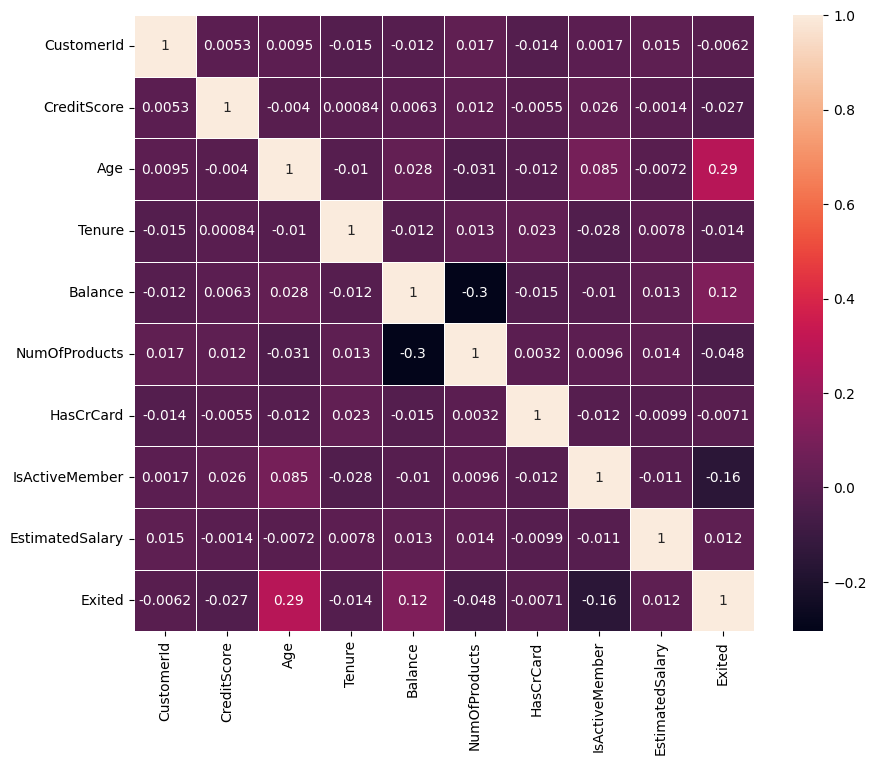

In [ ]:
def correlation_matrix(data):
  num_cols = data.select_dtypes(include = np.number).columns
  data = data[num_cols]
  fig = plt.gcf()
  fig.set_size_inches(10,8)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize = 10)
  sns.heatmap(data.corr(), annot = True, linewidths = 0.5)
  plt.show()

correlation_matrix(data)

In [ ]:
# Pivot Tables

def pivot_table(data):
  geo_gender_sal_table = pd.pivot_table(data, values = 'EstimatedSalary', index='Geography', columns= 'Gender', aggfunc = 'mean')
  geo_gender_age_table = pd.pivot_table(data, values = 'Age', index='Geography', columns= 'Gender', aggfunc = 'mean')

  print("Estimated Salary")
  print(geo_gender_sal_table)
  print("\n####################################\n")
  print("Age")
  print(geo_gender_age_table)


pivot_table(data)

Estimated Salary
Gender            Female           Male
Geography                              
France      99564.252755  100174.252495
Germany    102446.424124   99905.033959
Spain      100734.107475   98425.687680

####################################

Age
Gender        Female       Male
Geography                      
France     38.773994  38.296404
Germany    40.154233  39.424772
Spain      39.199265  38.649135


<Axes: xlabel='Geography', ylabel='count'>

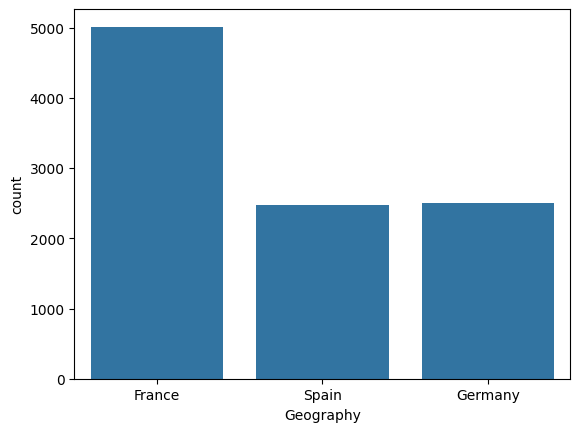

In [ ]:
# plot graphs
sns.countplot(x = 'Geography', data = data)

<Axes: xlabel='Gender', ylabel='count'>

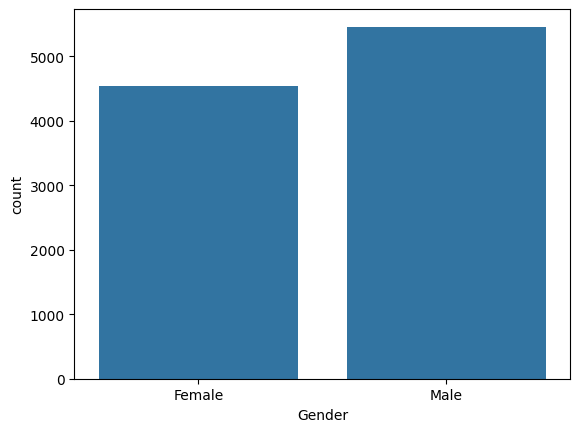

In [ ]:
sns.countplot(x= "Gender", data = data)

<Axes: xlabel='Age', ylabel='Count'>

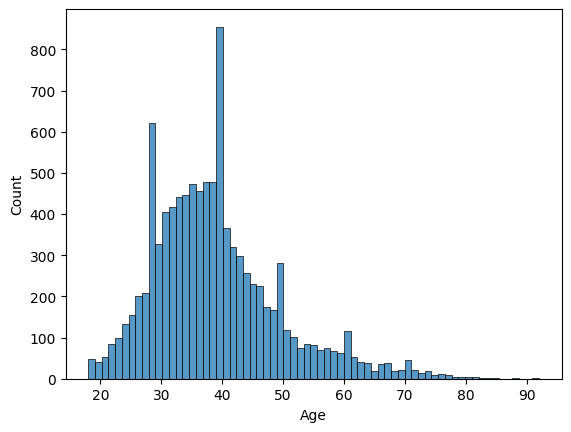

In [ ]:
sns.histplot(data = data['Age'])